# importing libraries and dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # To handle imbalanced datasets
import matplotlib.pyplot as plt


In [2]:
# importing dataset

train_path = r"C:\Users\excel\Downloads\archive (2)\fraudTrain.csv"
test_path = r"C:\Users\excel\Downloads\archive (2)\fraudTest.csv"

# Load dataset

training_data = pd.read_csv(train_path)
testing_data = pd.read_csv(test_path)



# EDA (Exploratory data analysis)

EDA for identifying patters in transaction data, detect anomalies, and identify the underlying structure of fraudulent activity.

In [3]:
training_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# dropping the "unnamed 0" column as we  alread have indexes:
training_data = training_data.drop(columns=['Unnamed: 0'])

training_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# checking for null values in the training data:
training_data.isnull().sum()



trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# check for duplicate column in training data:
training_data.duplicated().sum()

0

In [7]:
# Check the data types of all columns
print(training_data.dtypes)

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [8]:
# Convert 'trans_date_trans_time' to datetime
training_data['trans_date_trans_time'] = pd.to_datetime(training_data['trans_date_trans_time'])

# Convert 'dob' to datetime
training_data['dob'] = pd.to_datetime(training_data['dob'])

training_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [9]:
testing_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
# dropping the "unnamed 0" column as we  alread have indexes:
testing_data = testing_data.drop(columns=['Unnamed: 0'])

testing_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [11]:
# check for duplicate column in testing data:
testing_data.duplicated().sum()



0

In [12]:
# Check the data types of all columns
print(testing_data.dtypes)

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [13]:
# Convert 'trans_date_trans_time' to datetime
testing_data['trans_date_trans_time'] = pd.to_datetime(testing_data['trans_date_trans_time'])

# Convert 'dob' to datetime
testing_data['dob'] = pd.to_datetime(testing_data['dob'])

testing_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

<Axes: xlabel='gender', ylabel='count'>

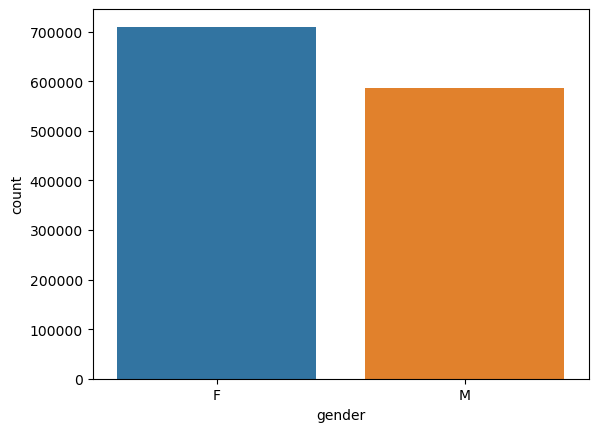

In [14]:
# Count plot for gender distribution
import seaborn as sns
sns.countplot(x='gender', data=training_data)

<Axes: xlabel='is_fraud', ylabel='count'>

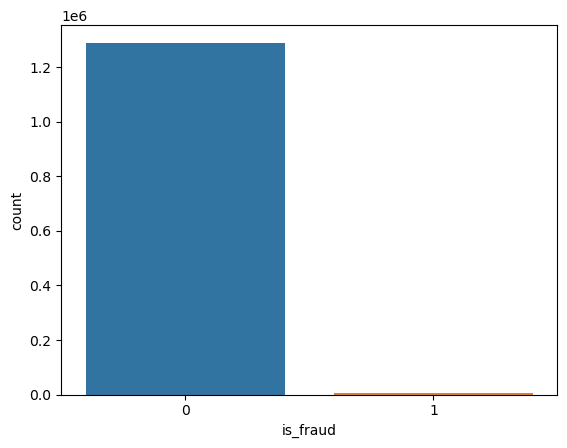

In [15]:
# Count plot for fraud distribution (target variable)
sns.countplot(x='is_fraud', data=training_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

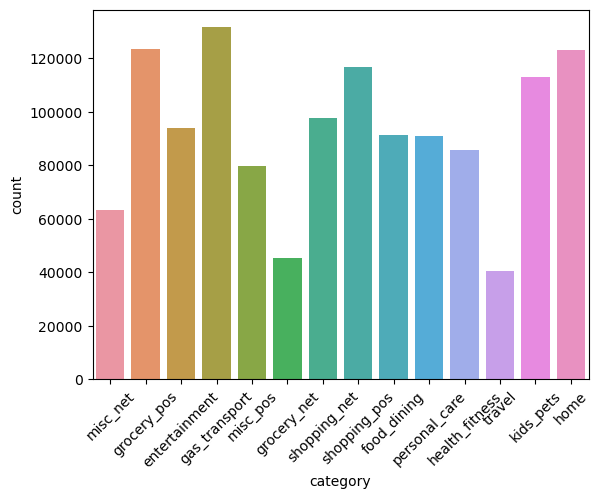

In [16]:
#Count plot for merchant categories
sns.countplot(x='category', data=training_data)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

In [17]:
# bivariant nanalysis
#checks corelation between numerical features

<Axes: xlabel='hour', ylabel='count'>

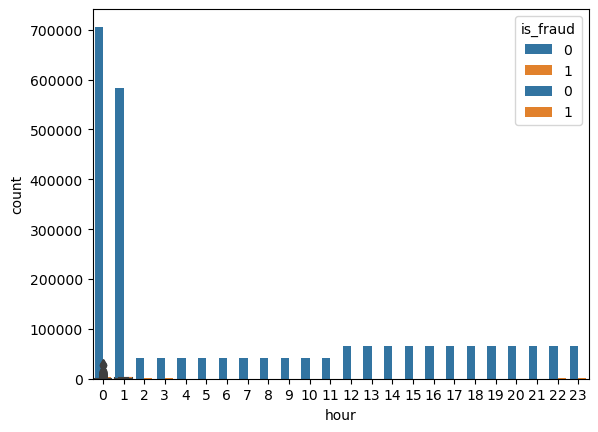

In [18]:
# Fraudulent transaction amount distribution
sns.boxplot(x='is_fraud', y='amt', data=training_data)

# Fraud vs. gender distribution
sns.countplot(x='gender', hue='is_fraud', data=training_data)

# Fraud vs. transaction time distribution
training_data['hour'] = training_data['trans_date_trans_time'].dt.hour
sns.countplot(x='hour', hue='is_fraud', data=training_data)


In [55]:
# identifying outliers
# Identifying outliers in transaction amounts
from scipy import stats

training_data['amt_zscore'] = stats.zscore(training_data['amt'])
outliers = training_data[training_data['amt_zscore'].abs() > 3]
print(outliers)


                      cc_num       amt    zip      lat      long  city_pop  \
138         4060579726528237  3.530896  66070  39.2136  -95.4404      2661   
232      4311368326621416041  6.144858  80736  40.7692 -103.0968       648   
296             571844099986  5.235342  40202  38.2507  -85.7476    736284   
511         4509142395811241  9.771446  31563  31.6489  -82.1982      1324   
723         4265776278887457  6.095269  72047  35.2087  -92.2123       969   
...                      ...       ...    ...      ...       ...       ...   
1296014      378278619832195  5.350677  97403  44.0385 -123.0614    191096   
1296211     3598215285024754  3.671680  11710  40.6729  -73.5365     34496   
1296228        4538566639857  3.585288   7022  40.8170  -74.0000     13835   
1296482     4839615922685395  3.127318  47434  39.0130  -86.5457        76   
1296547        4755696071492  4.269437  75048  32.9643  -96.6012     20328   

                                trans_num   unix_time  merch_la

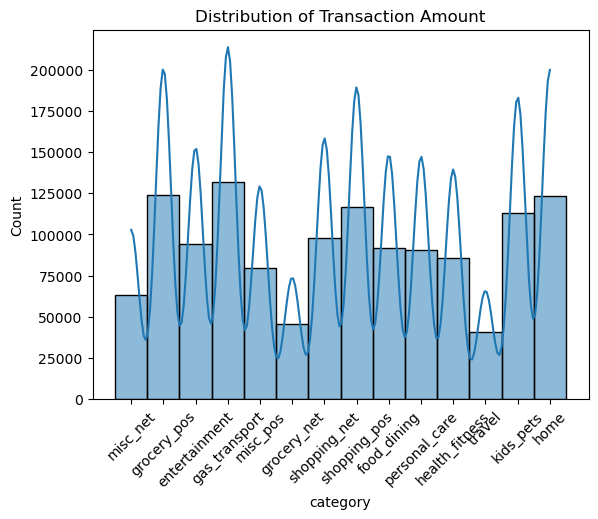

In [20]:

# Univariate Analysis
sns.histplot(training_data["category"], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


C:\Users\excel\AppData\Local\Temp\ipykernel_18908\3996983710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


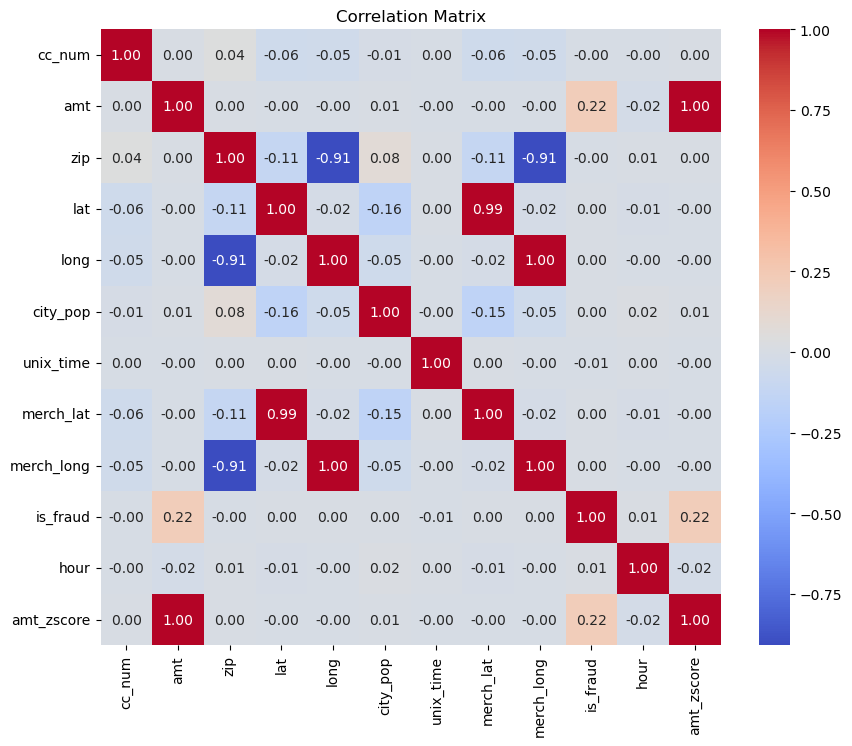

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [22]:
# feature engineering:
training_data['day_of_week'] = training_data['trans_date_trans_time'].dt.dayofweek
training_data['year'] = pd.to_datetime(training_data['trans_date_trans_time']).dt.year
training_data['month'] = training_data['trans_date_trans_time'].dt.month
training_data['hour'] = training_data['trans_date_trans_time'].dt.hour


In [23]:
# trans_date_trans_time adn dob
training_data['time_since_birth'] = (training_data['trans_date_trans_time'] - training_data['dob']).dt.days


In [24]:
# feature engineering:
testing_data['day_of_week'] = testing_data['trans_date_trans_time'].dt.dayofweek
testing_data['year'] = pd.to_datetime(testing_data['trans_date_trans_time']).dt.year
testing_data['month'] = testing_data['trans_date_trans_time'].dt.month
testing_data['hour'] = testing_data['trans_date_trans_time'].dt.hour



In [25]:
# trans_date_trans_time and dob
testing_data['time_since_birth'] = (testing_data['trans_date_trans_time'] - testing_data['dob']).dt.days


In [26]:
training_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
training_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,hour,amt_zscore,day_of_week,year,month,time_since_birth
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1325376018,36.011293,-82.048315,0,0,-0.407826,1,2019,1,11255
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1325376044,49.159047,-118.186462,0,0,0.230039,1,2019,1,14804
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1325376051,43.150704,-112.154481,0,0,0.934149,1,2019,1,20801
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1325376076,47.034331,-112.561071,0,0,-0.158132,1,2019,1,18982
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1325376186,38.674999,-78.632459,0,0,-0.177094,1,2019,1,11967


In [27]:
testing_data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
testing_data.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,year,month,hour,time_since_birth
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6,2020,6,12,19087
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6,2020,6,12,11113
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6,2020,6,12,18141
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6,2020,6,12,12020
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6,2020,6,12,23727


In [28]:
print(training_data.dtypes)

cc_num                int64
merchant             object
category             object
amt                 float64
first                object
last                 object
gender               object
street               object
city                 object
state                object
zip                   int64
lat                 float64
long                float64
city_pop              int64
job                  object
trans_num            object
unix_time             int64
merch_lat           float64
merch_long          float64
is_fraud              int64
hour                  int64
amt_zscore          float64
day_of_week           int64
year                  int64
month                 int64
time_since_birth      int64
dtype: object


0    99.421135
1     0.578865
Name: is_fraud, dtype: float64


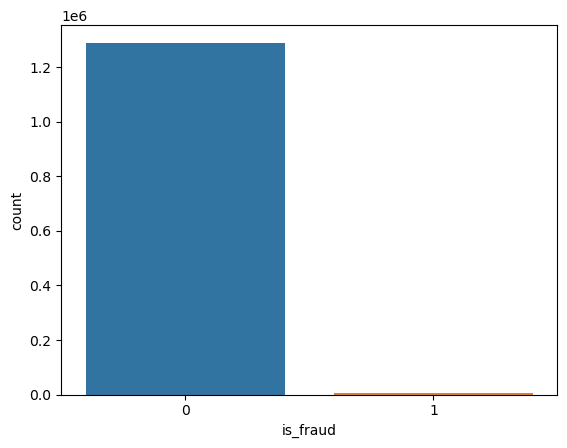

In [29]:
# Check for class imbalance
sns.countplot(x='is_fraud', data=training_data)

# Percentage of fraudulent transactions
fraud_percentage = training_data['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)


In [30]:
## not needed since i'm usign random forest

# # Separate the features (X) and target (y) among both training and testing data:
# X_train = training_data.drop('is_fraud', axis=1)
# y_train = training_data['is_fraud']

# X_test = testing_data.drop('is_fraud',axis=1)
# y_test = testing_data['is_fraud']



In [31]:
print(training_data.shape)

(1296675, 26)


In [32]:
training_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'amt_zscore', 'day_of_week', 'year', 'month', 'time_since_birth'],
      dtype='object')

In [33]:
testing_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'day_of_week', 'year', 'month', 'hour', 'time_since_birth'],
      dtype='object')

# Preprocessing

In [34]:
print(testing_data['merchant'])

0                        fraud_Kirlin and Sons
1                         fraud_Sporer-Keebler
2         fraud_Swaniawski, Nitzsche and Welch
3                            fraud_Haley Group
4                        fraud_Johnston-Casper
                          ...                 
555714                   fraud_Reilly and Sons
555715                    fraud_Hoppe-Parisian
555716                         fraud_Rau-Robel
555717                   fraud_Breitenberg LLC
555718                       fraud_Dare-Marvin
Name: merchant, Length: 555719, dtype: object


In [35]:
import pandas as pd

# Defining your categorical columns
categorical_cols = ['merchant', 'category', 'gender', 'city', 'job', 'first', 'last', 'street', 'state']


# Repeating the same for the testing data to ensure consistency between train and test
for col in categorical_cols:
    mean_encoded = training_data.groupby(col)['is_fraud'].mean()
    testing_data[f'{col}_encoded'] = testing_data[col].map(mean_encoded)
    testing_data.drop(col, axis=1, inplace=True)

# Now training_data and testing_data will have the encoded columns



In [36]:
training_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,hour,amt_zscore,day_of_week,year,month,time_since_birth
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1325376018,36.011293,-82.048315,0,0,-0.407826,1,2019,1,11255
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1325376044,49.159047,-118.186462,0,0,0.230039,1,2019,1,14804
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1325376051,43.150704,-112.154481,0,0,0.934149,1,2019,1,20801
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1325376076,47.034331,-112.561071,0,0,-0.158132,1,2019,1,18982
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1325376186,38.674999,-78.632459,0,0,-0.177094,1,2019,1,11967


In [37]:

# Loop through each categorical column and apply target encoding
for col in categorical_cols:
    # Calculate the mean of 'is_fraud' for each category in the column
    mean_encoded = training_data.groupby(col)['is_fraud'].mean()
    
    # Replace the categories in the column with the mean value
    training_data[f'{col}_encoded'] = training_data[col].map(mean_encoded)

    # Drop the original categorical column if needed (optional)
    training_data.drop(col, axis=1, inplace=True)


In [38]:
#training_data.head()

In [39]:
# Separate the features (X) and target (y) among both training and testing data:
X_train = training_data.drop('is_fraud', axis=1)
y_train = training_data['is_fraud']

X_test = testing_data.drop('is_fraud',axis=1)
y_test = testing_data['is_fraud']

In [40]:
print(X_train.dtypes)

cc_num                int64
amt                 float64
zip                   int64
lat                 float64
long                float64
city_pop              int64
trans_num            object
unix_time             int64
merch_lat           float64
merch_long          float64
hour                  int64
amt_zscore          float64
day_of_week           int64
year                  int64
month                 int64
time_since_birth      int64
merchant_encoded    float64
category_encoded    float64
gender_encoded      float64
city_encoded        float64
job_encoded         float64
first_encoded       float64
last_encoded        float64
street_encoded      float64
state_encoded       float64
dtype: object


In [41]:
print(X_test.dtypes)

cc_num                int64
amt                 float64
zip                   int64
lat                 float64
long                float64
city_pop              int64
trans_num            object
unix_time             int64
merch_lat           float64
merch_long          float64
day_of_week           int64
year                  int64
month                 int64
hour                  int64
time_since_birth      int64
merchant_encoded    float64
category_encoded    float64
gender_encoded      float64
city_encoded        float64
job_encoded         float64
first_encoded       float64
last_encoded        float64
street_encoded      float64
state_encoded       float64
dtype: object


In [43]:
print(y_train.dtypes)

int64


In [44]:
print(y_test.dtypes)

int64


In [45]:
# Drop the 'trans_num' column from the features before applying SMOTE
# as it is a unique transaction number that is not useful for resampling
X_train = X_train.drop(columns=['trans_num'])

In [46]:
# Handle class imbalance using SMOTE since its 1% fraud and 99% legitimade 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model Training

In [47]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

## some additional modifications:

In [59]:
# Drop the 'trans_num' column from the features before prediction
# as the feature names should be the same in both training and testing data
# namely "The feature names should match those that were passed during fit"

## X_test = X_test.drop(columns=['trans_num'])  # should be UNCOMMENTED if i restart the kernel!!



In [60]:
# and i changed the name of a column whilst i was trying to find outliers in the training dataset
# therefore, we'll replace the name with the same name used in the training dataset
# so that we have same feature names
X_test['amt_zscore'] = X_test['amt']

In [62]:
# Reordering the feature_names in x_test to match those in  x_train

# Reorder X_test columns to match the order in X_train
X_test = X_test[X_train.columns]

# Verify if the order now matches
assert list(X_test.columns) == list(X_train.columns), "Feature order in X_test does not match X_train!"
print("Your task i done. Go to SLEEP!")

Your task i done. Go to SLEEP!


In [65]:
print(set(X_train.columns) - set(X_test.columns))  # Missing columns


set()


In [66]:
nan_columns = X_test.columns[X_test.isnull().any()]
print("Columns with NaNs:", nan_columns)


Columns with NaNs: Index(['city_encoded', 'job_encoded', 'first_encoded', 'last_encoded',
       'street_encoded'],
      dtype='object')


In [69]:
print(X_test.isnull().sum())



cc_num                0
amt                   0
zip                   0
lat                   0
long                  0
city_pop              0
unix_time             0
merch_lat             0
merch_long            0
hour                  0
amt_zscore            0
day_of_week           0
year                  0
month                 0
time_since_birth      0
merchant_encoded      0
category_encoded      0
gender_encoded        0
city_encoded        124
job_encoded          30
first_encoded        31
last_encoded         49
street_encoded      163
state_encoded         0
dtype: int64


<Axes: >

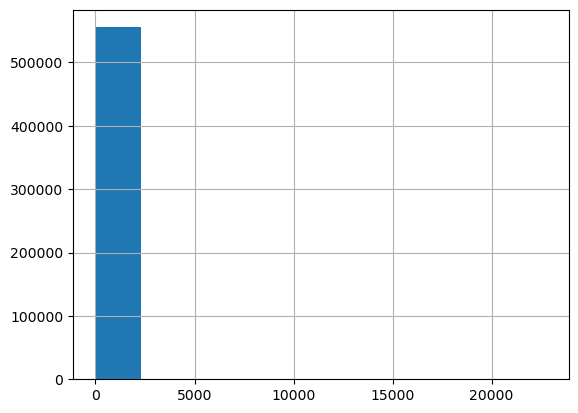

In [70]:
X_test['amt'].hist()


In [71]:
# replacing the NaN values with median beause the data is skewed
X_test.fillna(X_test.median(), inplace=True)

In [72]:
# Predictions
y_pred = rf_model.predict(X_test)  # prediction
y_prob = rf_model.predict_proba(X_test)[:, 1]  # For AUC, we need the probability of the positive class

# Model Evaluation

In [76]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report

# Calculate each metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9959
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.2025

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [77]:
# the "additional modifications" could've been better, but I am running out of time since the submission deadline is distinguishingly different in every place where it is mentioned.